In [21]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.signal import morlet2
import scipy.io as sio

from utils import *

In [22]:
handler = Signal_Handler()
display = Signal_Display()

# Задание 1

In [23]:
def Morlet_Wavelet(x: np.ndarray, s: float, w: float):
    return np.exp(-x ** 2 / s) * np.exp(2j * np.pi * x * w)

In [24]:
x_1, y_1, dt = handler.make_signal('other',  interval = (-3, 3), func = lambda t: Morlet_Wavelet(t, s = 1, w = 1))
x_ft1, y_ft1 = handler.find_spectrum(y_1, dt)

c:\Users\Sanya\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


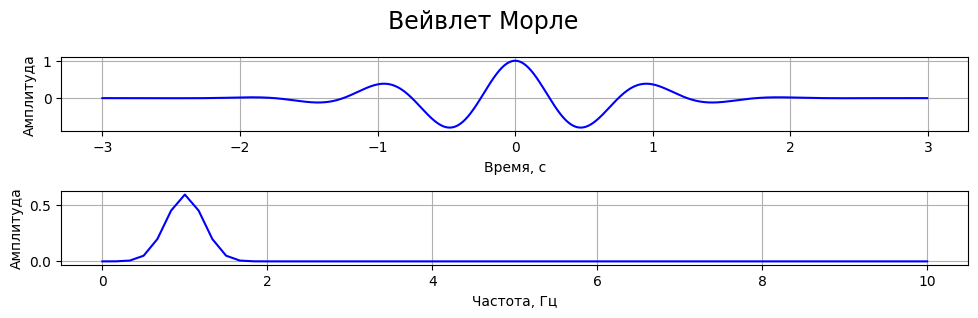

In [25]:
display.clear()

display.make_plot(0, x_1, y_1)
display.make_plot(1, x_ft1, y_ft1, is_spectrum = True,  interval = (0, 10))

display.plot(title = 'Вейвлет Морле')

# Задание 2

In [26]:
def MHAT_Wavelet(x: np.ndarray):
    return np.exp(-x ** 2 / 2) * (1 - x ** 2)

In [27]:
x_2, y_2, dt = handler.make_signal('other',  interval = (-4, 4), func = lambda t: MHAT_Wavelet(t))
x_ft2, y_ft2 = handler.find_spectrum(y_2, dt)

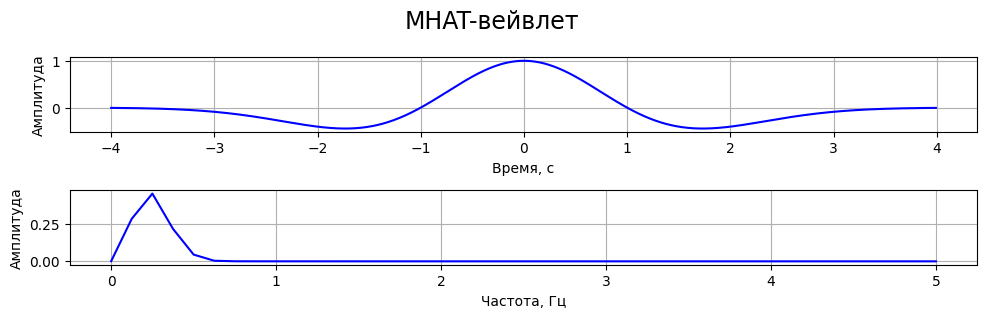

In [28]:
display.clear()

display.make_plot(0, x_2, y_2)
display.make_plot(1, x_ft2, y_ft2, is_spectrum = True,  interval = (0, 5))

display.plot(title = 'MHAT-вейвлет')

# Задание 3

In [29]:
def Haar_Wavelet(x: np.ndarray):

    wavelet = np.zeros_like(x)
    wavelet[(x >= 0) & (x < 0.5)] = 1
    wavelet[(x >= 0.5) & (x < 1)] = -1

    return wavelet

In [30]:
x_3, y_3, dt = handler.make_signal('other',  interval = (-4, 4), func = lambda t: Haar_Wavelet(t))
x_ft3, y_ft3 = handler.find_spectrum(y_3, dt)

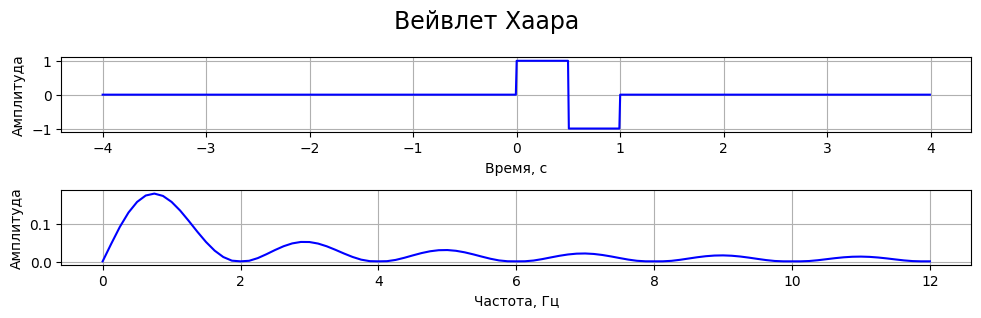

In [31]:
display.clear()

display.make_plot(0, x_3, y_3)
display.make_plot(1, x_ft3, y_ft3, is_spectrum = True,  interval = (0, 12))

display.plot(title = 'Вейвлет Хаара')

# Задание 4

In [32]:
x, y, dt = handler.make_signal('cos', interval = (0, 0.1), A = 1, w = Converter(f = [50, 250, 450]).w)
y += np.random.normal(0, 2, size = y.size)

x_ft, y_ft = handler.find_spectrum(y, dt)

In [33]:
y_conv1 = handler.convolve(y, y_1, mode = 'same')
y_conv2 = handler.convolve(y, y_2, mode = 'same')
y_conv3 = handler.convolve(y, y_3, mode = 'same')

In [34]:
y_conv_ft1 = handler.find_spectrum(y_conv1, dt)[1]
y_conv_ft2 = handler.find_spectrum(y_conv2, dt)[1]
y_conv_ft3 = handler.find_spectrum(y_conv3, dt)[1]

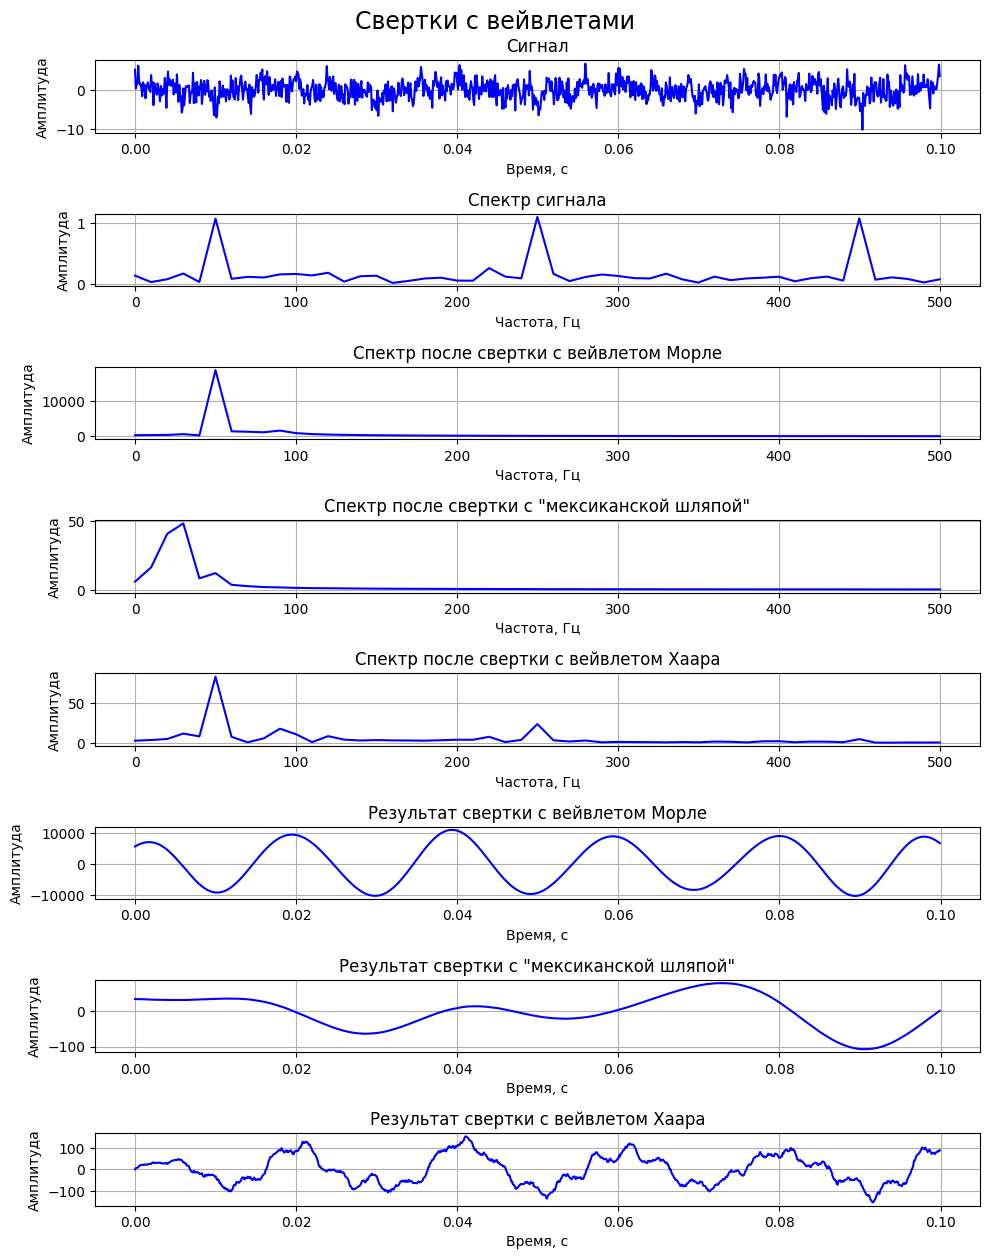

In [35]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')
display.make_plot(1, x_ft, y_ft, title = 'Спектр сигнала', is_spectrum = True,  interval = (0, 500))

display.make_plot(2, x_ft, y_conv_ft1, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с вейвлетом Морле')
display.make_plot(3, x_ft, y_conv_ft2, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с "мексиканской шляпой"')
display.make_plot(4, x_ft, y_conv_ft3, is_spectrum = True, interval = (0, 500), title = 'Спектр после свертки с вейвлетом Хаара')

display.make_plot(5, x, y_conv1, title = 'Результат свертки с вейвлетом Морле')
display.make_plot(6, x, y_conv2, title = 'Результат свертки с "мексиканской шляпой"')
display.make_plot(7, x, y_conv3, title = 'Результат свертки с вейвлетом Хаара')

display.plot(title = 'Свертки с вейвлетами')

# Задание 5

In [36]:
# Сигнал с переменной частотой
x, dt = np.linspace(-3, 3, num = 1000, retstep = True)
y = handler._cos(x, A = 1, w = Converter(f = x ** 2 + x + 3).w)

In [37]:
def cwt(time, signal, wavelet, scales = None, w = 5, ylim = None):

    fs = time.size / (time[-1] - time[0])
    freq = np.linspace(1, fs / 2, 100)
    
    if scales is None:
        scales = w * fs / (2 * freq * np.pi)

    cwtmatr = np.empty((scales.size, signal.size), dtype = np.complex128)

    for i, width in enumerate(scales):
        N = np.min([10 * width, signal.size])
        wavelet_data = np.conj(wavelet(M = N, s = width, w = w)[::-1])
        
        cwtmatr[i] = np.convolve(signal, wavelet_data, mode = 'same')
    
    vmax = np.max(np.abs(cwtmatr))
    vmin = vmax / 1.e5

    plt.contourf(x, freq, np.abs(cwtmatr), vmax = vmax, vmin = vmin, cmap = 'jet')

    plt.xlabel('Время, с')
    plt.ylabel('Частота, Гц')

    plt.ylim(ylim)
    plt.show()

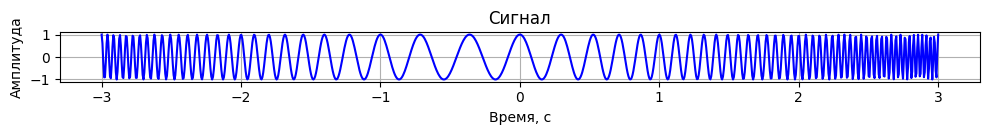

In [38]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')

display.plot()

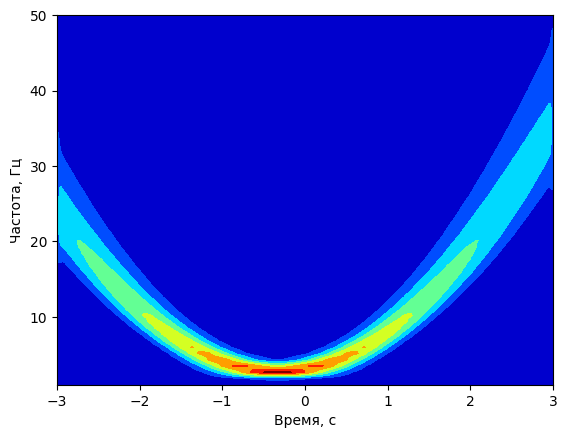

In [39]:
cwt(x, y, morlet2, ylim = [1, 50])

# Задание 6

In [40]:
samples = sio.loadmat('Lab6_Data.mat')

In [41]:
x = samples['timevec'].flatten()
y = samples['data'].flatten() 

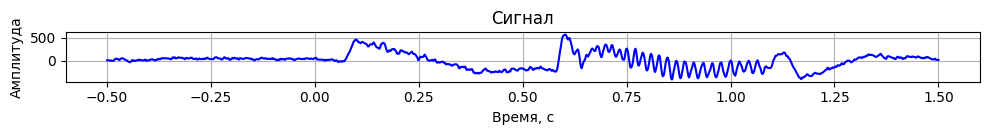

In [42]:
display.clear()

display.make_plot(0, x, y, title = 'Сигнал')

display.plot()

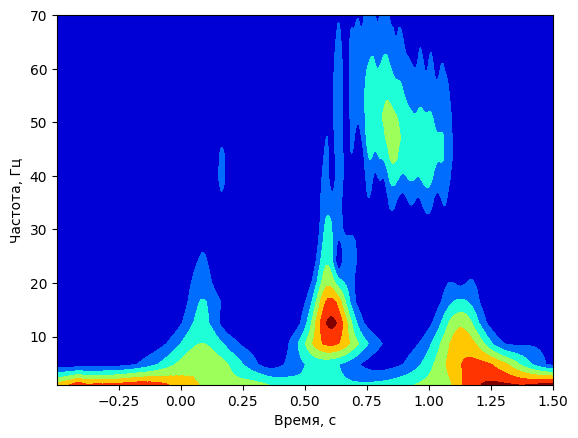

In [43]:
cwt(x, y, morlet2, ylim = [1, 70])

# Задание 7

In [44]:
samplerate, samples = sio.wavfile.read('lab6_audio.wav')

In [45]:
interval = (358.76, 364.63)

In [46]:
i1 = int(interval[0] * samplerate)
i2 = int(interval[1] * samplerate)

In [47]:
y = np.sum(samples[i1:i2, :], axis = 1)
x = np.linspace(interval[0], interval[1], num = y.size)

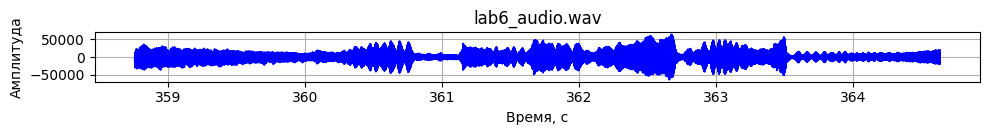

In [48]:
display.clear()

display.make_plot(0, x, y, title = 'lab6_audio.wav')

display.plot()

In [49]:
cwt(x, y, morlet2)